In [1]:
%matplotlib inline 
#para poder mostrar figuras integradas en el notebook
# figuras como las de los grafos

# Implementación de A*

En este notebook se realizará la implementación del algoritmo A\* que funcionará primeramente sobre un grafo y posteriormente sobre un mapa 2D (un tablero).
La implementación de A\* trabajará con nodos, así que será trivial adaptar el algoritmo para que realice búsquedas en otro tipo de problemas.
Para realizar dicha adaptación solo será necesario implementar nuevas funciones de sucesores, meta y heurístico. 
De hecho, la práctica utilizará el código de este notebook, razón por la que existen ciertas celdas que comienzan por # Cargar Celda


```Python 

def AStar(inicial, sucesoresF, metaF, heuristicoF):
    '''
    Algoritmo A*. 
    Recibe:
    inicial: Nodo inicial
    sucesoresF: Función que toma un nodo y devuelve una lista de nodos sucesores (dependerá de cada problema).
    metaF: Función que toma un estado y devuelve True si es un estado meta (dependerá de cada problema)
    heuristicoF: Función que toma un estado y devuelve un valor númerico con la estimación del coste restante para llegar a una meta (dependerá de cada problema)
    
    Return: solución [estado1, estado2,..., estadoN] o [] si no hay solución
    '''
    
    '''
    creo abiertos y cerrados.
    abiertos se inicializa con el nodo inicial.
    cerrados estará vacía
    
    mientras abiertos no esté vacía:
        recupero de abiertos el nodo con menor f (nodoActual).
        guardo nodoActual en cerrados.
        compruebo si es meta:
            si lo es devuelve el camino
        obtengo los sucesores, la función genera sucesores recibe a la que calcula la h
        para suc en sucesores:
            si no está en abiertos ni en cerrados 
                lo meto en abiertos
            está en abiertos pero suc tiene menor f
                lo actualizo en abiertos
            esta en cerrados pero suc tiene menor f
                lo elimino de cerrados y lo meto en abiertos
    devuelvo [], no había solución
    '''
        
```       






_______

Implementa AStar

In [2]:
# Cargar Celda

def AStar(inicial, sucesoresF, metaF, heuristicoF):
    abiertos = Abiertos()
    abiertos.put(inicial)
    
    # La lista de cerrados se cra como un set
    cerrados = {}
    
    # Mientras queden nodos en abiertos 
    while not abiertos.empty():
        # El mejor nodo abirto pasa a cerrado y se expande
        mejor = abiertos.pop()
        
        # Seguridad
        if mejor[1].getG() > 1000:
            break
            
        # print("Se ha escogido",mejor)
        cerrados[mejor[1].getEstado()]=mejor
        
        print("Nodo abierto:"+str(mejor))
        
        # Se comprueba si el nodo es el destino
        if metaF(mejor[1]):
            print("Camino")
            print(mejor[1].camino())
            return mejor[1].camino()
        
        # Se obtienen los nodos sucesores
        sucesores = sucesoresF(mejor[1],heuristicoF)
        
        #print("Sucesores:"+str(sucesores))
        
        # Se comprueba si los sucesores es
        for suc in sucesores:
            h = metaF(suc)
            # Se busca por estado
            if abiertos.getNodo(suc.getEstado()):
                nodo = abiertos.getNodo(suc.getEstado())
                # Si f(nabierto) > f(nsucesor)
                #   Se actualiza en abiertos
                if nodo.getF() > suc.getF():
                    abiertos.update(nodo,suc);
            elif suc.getEstado() in cerrados:
                # Si f(ncerrado) > f(nsucesor)
                #   Se saca de cerrados -> abiertos
                nodo = cerrados[suc.getEstado()]
                if nodo[1].getF() > suc.getF():
                    cerrados.pop(suc.getEstado())
                    f = heuristicoF(suc.getEstado()) + suc.getG()
                    abiertos.put(Nodo(suc.getEstado(),mejor[1],suc.getG(),f))
            else:
                # Si no esta ni en abiertos ni en cerrados
                # F() = G() + H()
                f = heuristicoF(suc.getEstado()) + suc.getG()
                # abiertos.put(Nodo(suc.getEstado(),mejor[1],suc.getG(),f))
                abiertos.put(suc)
        print("********")
        print(abiertos)
        print("********")

    return []

## Implementaciones de Nodo y Abiertos

Versión del profesor de lo pedido en el notebook anterior.

In [3]:
# Cargar Celda

class Nodo:    
    def __init__(self,estado,padre,g,f):
        self.estado=estado
        self.padre=padre
        self.g = g
        self.f = f
    def getPadre(self):
        return self.padre
    def getEstado(self):
        return self.estado
    def getG(self):
        return self.g
    def getF(self):
        return self.f
    
    def camino(self):
        # Metodo no recursivo
        nodo = self
        path = [nodo]
        while (nodo.getPadre()):
            nodo = nodo.getPadre()
            path.insert(0,nodo)
        
        return path
        
        # Metodo recursivo
        #if self.getPadre() is None:
            #print(str(self))
        #    return [self]
        #else:
            #print(str(self))
        #    return [self] + self.getPadre().camino()
    
    def __repr__(self):
        return "Nodo "+str(self.estado)+" F=("+str(self.f)+") G=("+str(self.getG())+")"
    
    def __lt__(self, other):
        return self.f<other.f
        

    def __eq__(self, other):
        
        return self.getEstado()==other.getEstado()
    
    # A completar por parte de los estudiantes
    

In [4]:
# Cargar Celda

import queue as queue

class Abiertos:
    def __init__(self):
        self.colaPrioridad = queue.PriorityQueue()
    
    def put(self,nodo):
        self.colaPrioridad.put((nodo.getF(),nodo))
    
    def pop(self):
        return self.colaPrioridad.get()
    
    def empty(self):
        return self.colaPrioridad.empty()
    
    def getNodo(self,estado):
        for elem in self.colaPrioridad.queue:
            if elem[1].getEstado()==estado:
                return elem[1]
        return None           
    
    
    def update(self,nodoViejo,nodoNuevo):
        self.colaPrioridad.queue.remove((nodoViejo.getF(),nodoViejo))
        self.colaPrioridad.put((nodoNuevo.getF(),nodoNuevo))
        
    def getNodes(self):
        return list(map(lambda x:x[1],self.colaPrioridad.queue))
    
    def __str__(self):
        return str(self.colaPrioridad.queue)

    
    # A compltear por parte de los estudiantes
    
    

# El grafo de búsqueda

Para probar el algoritmo de A\* en un problema sencillo y con solución y traza conocida se va a crear un grafo como el de los apuntes de teoría usando la librería networkx. 

Básicamente el grafo se crea con nx.Graph(), con nx.DiGraph() le estoy diciendo que es dirigido.

Se crean nodos con add_node y se crean arcos con add_edge

los hijos del nodo 1 son:
[2, 3]


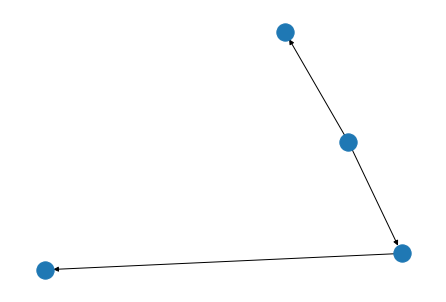

In [5]:
# ejemplo de grafo básico

import networkx as nx
import matplotlib.pyplot as plt

# Creo el grafo
Gprueba = nx.DiGraph()

Gprueba.add_node(1)    
Gprueba.add_node(2)    
Gprueba.add_node(3)    

Gprueba.add_edge(1,2)
Gprueba.add_edge(1,3)
Gprueba.add_edge(2,4)

# consultar los hijos del nodo 1
# el grafo G funciona como un diccionario
print("los hijos del nodo 1 son:")
print(list(Gprueba[1].keys()))


nx.draw(Gprueba)

Sabiendo estos conceptos básicos de creación de grafos, se va a pasar a crear un grafo como el de los apuntes de teoría.

Grafo de las diapositivas de A*


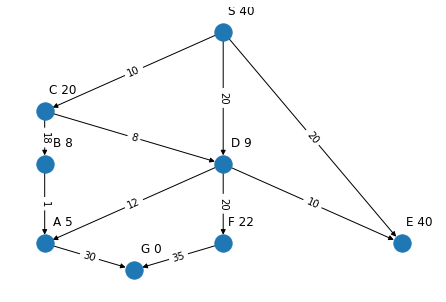

In [6]:
# Creo el grafo
Grafo = nx.DiGraph()

# este diccionario almacena los hijos que tiene cada padre
hijos = {'S': 'CDE','C': 'BD','B': 'A','D': 'AFE','A': 'G','F': 'G'}

# este diccionario almacena los costes de cada camino
costes={('S', 'C'):10, ('S', 'D'): 20, ('S', 'E'): 20, ('C', 'B'): 18,
        ('C', 'D'): 8, ('B', 'A'): 1, ('D', 'A'): 12, ('D', 'F'): 20,
        ('D', 'E'): 10, ('A', 'G'): 30, ('F', 'G'): 35}

# este diccionario almacena los valores heurísticos de cada estado.
heuristico = {'S': 40, 'C': 20, 'B': 8, 'D': 9, 'A': 5, 'F': 22, 'E': 40, 'G': 0}

# este diccionario almacena las posiciones de cada nodo, solo es estética
posiciones = {'S':(20,100),'C':(10,70),
              'B':(10,50),'D':(20,50),
              'A':(10,20),'F':(20,20),
              'E':(30,20),'G':(15,10)}

# crea el grafo, añade nodos y arcos
node_labels={}
for nodo in heuristico:
    Grafo.add_node(nodo)
    node_labels[nodo]=nodo+" "+str(heuristico[nodo])
    if nodo in hijos:
        for hijo in hijos[nodo]:
            Grafo.add_edge(nodo,hijo) 

#dibuja el grafo
nx.draw(Grafo,pos = posiciones)
#dibuja las etiquetas de los nodos y los arcos
node_label_pos = {k:[v[0]+1,v[1]+8] for k,v in posiciones.items()}
node_label_handles = nx.draw_networkx_labels(Grafo,pos = node_label_pos,labels = node_labels)
nx.draw_networkx_edge_labels(Grafo, pos = posiciones, edge_labels=costes)
print("Grafo de las diapositivas de A*")

# Funciones de sucesores, meta y heurística sobre el grafo

A continuación se pueden ver como serían las funciones de sucesores, meta y heurística para el problema de la búsqueda en el grafo.

- Para crear un nodo inicial se le pasa al constuctor de Nodo el estado inicial, su nodo padre que en el caso inicial sería None, el valor de G que es 0 y el valor de F que sería G+H, en el caso inicial como G es 0, solo haría falta H.

- sucesoresGrafo. Se obtienen los sucesores, como el grafo 'Grafo' es un diccionario solamente tenemos que consultar las claves disponibles. Se actualiza la G usando el coste necesario para llegar al hijo que se saca del diccionario de costes. Se calcula la H invocando a la función heuristicaF.

- metaGrafo. Solamente compara que el estado sea o no sea 'G' que es el valor del estado meta.
- heuristicaGrafo. Consulta en el diccionario de valores heurísticos.

In [7]:
nodoInicial = Nodo('S',None,0,heuristico['S'])

def sucesoresGrafo(nodo,heuristicaF):
    estado = nodo.getEstado()
    g = nodo.getG()
    hijos = []
    
    for hijo in Grafo[estado].keys():
        nuevaG = g+costes[(estado,hijo)]
        h=heuristicaF(hijo)
        hijos.append(Nodo(hijo,nodo,nuevaG,nuevaG+h))
    return hijos

def metaGrafo(nodo):
    estado = nodo.getEstado()
    return estado=='G' 

def heuristicaGrafo(estado):
    return heuristico[estado]                
    
print(heuristicaGrafo('S'))
print(metaGrafo(nodoInicial))
print(sucesoresGrafo(nodoInicial,heuristicaGrafo))
    


40
False
[Nodo C F=(30) G=(10), Nodo D F=(29) G=(20), Nodo E F=(60) G=(20)]


In [8]:
camino = AStar(nodoInicial,sucesoresGrafo, metaGrafo, heuristicaGrafo)
camino

Nodo abierto:(40, Nodo S F=(40) G=(0))
********
[(29, Nodo D F=(29) G=(20)), (30, Nodo C F=(30) G=(10)), (60, Nodo E F=(60) G=(20))]
********
Nodo abierto:(29, Nodo D F=(29) G=(20))
********
[(30, Nodo C F=(30) G=(10)), (60, Nodo E F=(60) G=(20)), (37, Nodo A F=(37) G=(32)), (62, Nodo F F=(62) G=(40))]
********
Nodo abierto:(30, Nodo C F=(30) G=(10))
********
[(27, Nodo D F=(27) G=(18)), (36, Nodo B F=(36) G=(28)), (62, Nodo F F=(62) G=(40)), (60, Nodo E F=(60) G=(20)), (37, Nodo A F=(37) G=(32))]
********
Nodo abierto:(27, Nodo D F=(27) G=(18))
********
[(35, Nodo A F=(35) G=(30)), (36, Nodo B F=(36) G=(28)), (60, Nodo E F=(60) G=(20)), (60, Nodo F F=(60) G=(38))]
********
Nodo abierto:(35, Nodo A F=(35) G=(30))
********
[(36, Nodo B F=(36) G=(28)), (60, Nodo F F=(60) G=(38)), (60, Nodo E F=(60) G=(20)), (60, Nodo G F=(60) G=(60))]
********
Nodo abierto:(36, Nodo B F=(36) G=(28))
********
[(34, Nodo A F=(34) G=(29)), (60, Nodo E F=(60) G=(20)), (60, Nodo G F=(60) G=(60)), (60, Nodo F 

[Nodo S F=(40) G=(0),
 Nodo C F=(30) G=(10),
 Nodo B F=(36) G=(28),
 Nodo A F=(34) G=(29),
 Nodo G F=(59) G=(59)]

# Trazas más ricas

A la hora de depurar el algoritmo A\* es posible que las listas de abiertos y cerrados sean tan grandes que con un print no entendamos nada.

Se puede generar una tabla HTML con el resultado de una lista usando **pandas**, una librería de python para el tratamiento de tablas de datos que está incluida en Anaconda.




In [9]:
from IPython.display import display
import pandas
import numpy as np

debugData =[]

columns = ["Actual","Abiertos", "Sucesores", "Cerrados"]
debugData.append(["Nodo actual",
                  str(list(range(1,20))),
                  str(["suc1","suc2","suc3"]),
                  str(list(range(1,20)))])

display(pandas.DataFrame(np.array(debugData), columns=columns))

        

,Actual,Abiertos,Sucesores,Cerrados
0,Nodo actual,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","['suc1', 'suc2', 'suc3']","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


# Ejemplo de path finding

En mismo código de A\* lo vamos a usar para resolver un problema de *path finding* (movernos del punto A al punto B en una matriz 2D)

### Explicación de la representación del mapa y los estados


El mapa va a ser una lista en 2D con 0s en las casillas libres y 1s en los obstaculos

Un estado van a ser coordenadas (y,x)
Una tupla (y,x).

In [10]:
tablero = [[0,0,0,0,0,0,0],
          [0,0,1,1,0,1,0],
          [0,1,1,1,1,1,0],
          [0,1,1,1,1,1,0],
          [0,1,1,1,1,1,0],
          [0,0,0,0,0,0,0]]

estadoInicialPF = (1,1) #y,x
estadoFinalPF = (5,6)

In [11]:
# posibles movimientos 
posiblesMovs = [[1,0],[-1,0],[0,1],[0,-1]]

```Python
'''
Ejercicio 1

Hacer una función es_meta

'''
def es_meta(nodo):
    global estadoFinalPF

    # modifica para que compare el estado con estadoFinal
    return
    
```

```Python
'''
Ejercicio 2

Hacer una función es_valido
Primero comprueba que la coordenada está dentro de los 
límites del tablero y luego que en el tablero haya un 0
en dichas coordenadas
'''
def es_valida(estado):
    global tablero
    return False
```

```Python
''' ejercicio 3

como sería una función que calcula la distancia de manhatan de un estado respecto la meta
'''

def heuristicaPF(estado):
    global estadoFinalPF
    
    # completa aqui
    
    return 0
```

```Python
''' ejercicio 4

como sería una función que dado un estado devuelva 
todos los estados sucesores validos.


Pistas:
1-Con un for se recorren los posibles movimientos
    1.1 Se hace la suma del movimiento con el estado
    1.2 se comprueba si es válido y si lo es se introduce en hijos
2-para introducir elemenos en la lista de hijos se usa append
3- El coste del padre al hijo es 1, la heurística es la distancia de manhatan, que se pasa como argumento
'''

def sucesores(nodo,heuristicaF):
    hijos = []
    
    # completa aqui
    
    return hijos
```

In [12]:
# Cargar Celda

# implementa las funciones anteriores
posiblesMovs = [[1,0],[-1,0],[0,1],[0,-1]]

def sumaCoords(coord, mov):
    return (coord[0]+mov[0],coord[1]+mov[1])
        

def es_metaPF(nodo):
    return nodo.getEstado() == estadoFinalPF  


def es_valida(estado):
    if (estado[0] < len(tablero)) and (estado[1] < len(tablero[0])):        
       if tablero[estado[0]][estado[1]] == 0:
           return True
    #Cuando se pasa o es 1
    return False
    
    
def heuristicaPF(estado):
    return abs(estado[0]-estadoFinalPF[0]) + abs(estado[1]-estadoFinalPF[1])
    
 # A completar


def sucesoresPF(nodo,heuristicaF):
    hijos = []
    estado = nodo.getEstado()
    g = nodo.getG()
    
    for mov in posiblesMovs:
        suc = sumaCoords(nodo.getEstado(),mov)
        if (es_valida(suc)):
            # el coste del camino siempre es el mismo
            hijos.append(Nodo(suc,nodo,g+1,(g+1)+heuristicaF(suc)))
    return hijos

In [13]:
def creaNodoInicialPF(ei,ef, tab, hPF):
    global estadoFinalPF
    global tablero
    
    estadoFinalPF = ef 
    tablero = tab
    
    return Nodo(ei,None,0,hPF(ei))
    
    

nodoInicialPF = creaNodoInicialPF(estadoInicialPF,estadoFinalPF, tablero, heuristicaPF)

#test = es_valida((2,0))
#print(test)
#print(tablero[2][0])

h = heuristicaPF((5,6))
print(h)

AStar(nodoInicialPF,sucesoresPF, es_metaPF, heuristicaPF)

0
Nodo abierto:(9, Nodo (1, 1) F=(9) G=(0))
********
[(11, Nodo (0, 1) F=(11) G=(1)), (11, Nodo (1, 0) F=(11) G=(1))]
********
Nodo abierto:(11, Nodo (0, 1) F=(11) G=(1))
********
[(11, Nodo (1, 0) F=(11) G=(1)), (13, Nodo (-1, 1) F=(13) G=(2)), (11, Nodo (0, 2) F=(11) G=(2)), (13, Nodo (0, 0) F=(13) G=(2))]
********
Nodo abierto:(11, Nodo (1, 0) F=(11) G=(1))
********
[(11, Nodo (0, 2) F=(11) G=(2)), (11, Nodo (2, 0) F=(11) G=(2)), (13, Nodo (0, 0) F=(13) G=(2)), (13, Nodo (-1, 1) F=(13) G=(2)), (13, Nodo (1, -1) F=(13) G=(2))]
********
Nodo abierto:(11, Nodo (0, 2) F=(11) G=(2))
********
[(11, Nodo (2, 0) F=(11) G=(2)), (13, Nodo (-1, 1) F=(13) G=(2)), (11, Nodo (0, 3) F=(11) G=(3)), (13, Nodo (1, -1) F=(13) G=(2)), (13, Nodo (-1, 2) F=(13) G=(3)), (13, Nodo (0, 0) F=(13) G=(2))]
********
Nodo abierto:(11, Nodo (2, 0) F=(11) G=(2))
********
[(11, Nodo (0, 3) F=(11) G=(3)), (13, Nodo (-1, 1) F=(13) G=(2)), (11, Nodo (3, 0) F=(11) G=(3)), (13, Nodo (1, -1) F=(13) G=(2)), (13, Nodo (-1,

[Nodo (1, 1) F=(9) G=(0),
 Nodo (0, 1) F=(11) G=(1),
 Nodo (0, 2) F=(11) G=(2),
 Nodo (0, 3) F=(11) G=(3),
 Nodo (0, 4) F=(11) G=(4),
 Nodo (0, 5) F=(11) G=(5),
 Nodo (0, 6) F=(11) G=(6),
 Nodo (1, 6) F=(11) G=(7),
 Nodo (2, 6) F=(11) G=(8),
 Nodo (3, 6) F=(11) G=(9),
 Nodo (4, 6) F=(11) G=(10),
 Nodo (5, 6) F=(11) G=(11)]